In [48]:
# Required imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [58]:
data = pd.read_csv('./Stem_Cell_Synthetic_Dataset.csv')
df = pd.DataFrame(data)

In [54]:
# Step 1: Load the synthetic stem cell dataset
data = pd.read_csv('./Stem_Cell_Synthetic_Dataset.csv')

# Step 2: Preprocess the data (e.g., normalize columns or filter biomarkers)
# Split features (X) and target (y)
X = data.drop(['Sample ID', 'Confidence Level of Viability (%)'], axis=1)  # Features
y = data['Confidence Level of Viability (%)']  # Target: Confidence Level of Viability

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Evaluate the model on test data
y_pred = rf_model.predict(X_test)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared (R2):", r2_score(y_test, y_pred))


Mean Squared Error (MSE): 26.20019898581091
R-squared (R2): 0.30575187061266995


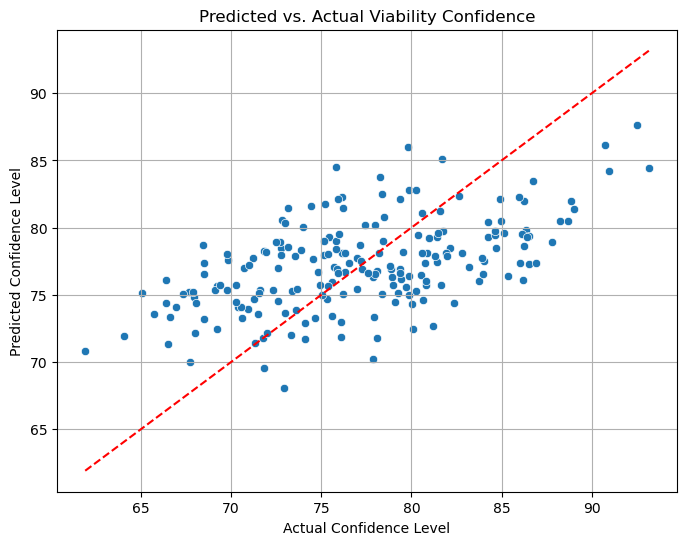

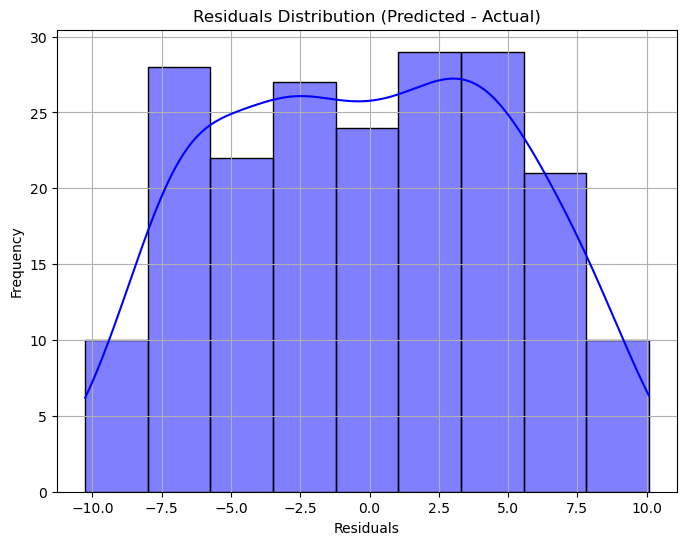

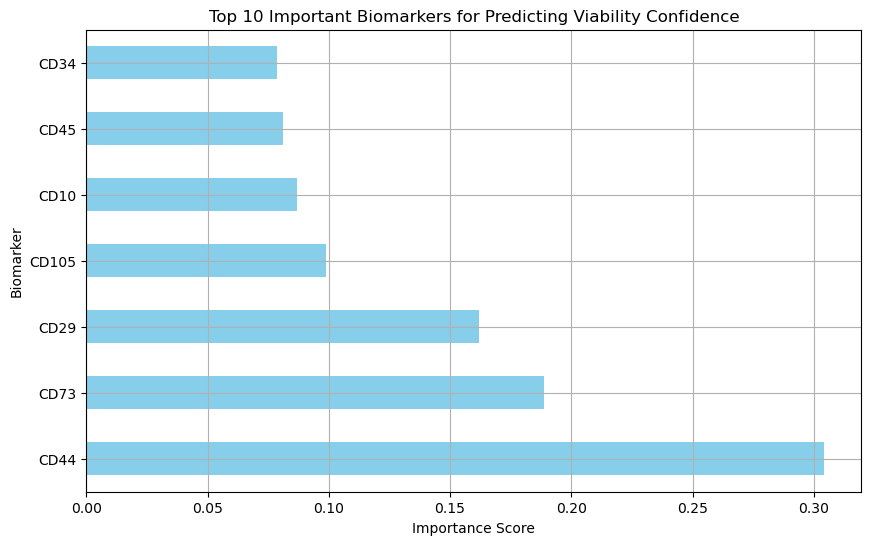

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Predicted vs. Actual Values Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicted vs. Actual Viability Confidence')
plt.xlabel('Actual Confidence Level')
plt.ylabel('Predicted Confidence Level')
plt.grid(True)
plt.show()

# Step 2: Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.title('Residuals Distribution (Predicted - Actual)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 3: Feature Importance Plot
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Important Biomarkers for Predicting Viability Confidence')
plt.xlabel('Importance Score')
plt.ylabel('Biomarker')
plt.grid(True)
plt.show()


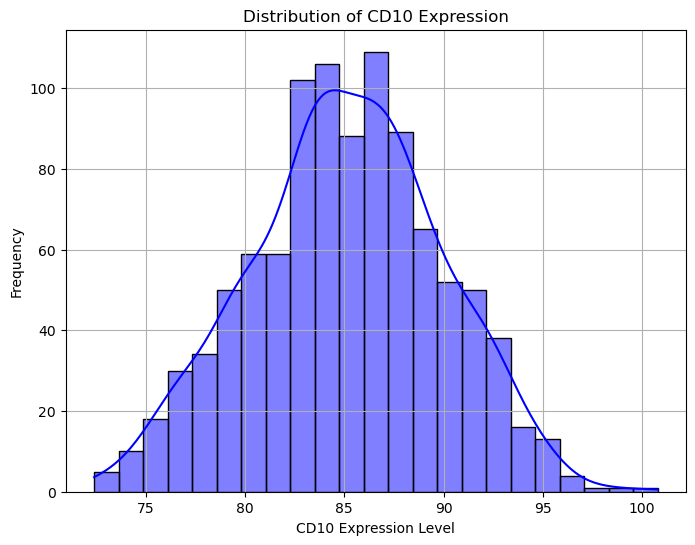

/var/folders/1x/lcp_qd3j3k79tqccv3xz44qr0000gn/T/ipykernel_26023/2379546368.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['CD44'], y=df['CD73'], cmap='Blues', shade=True)


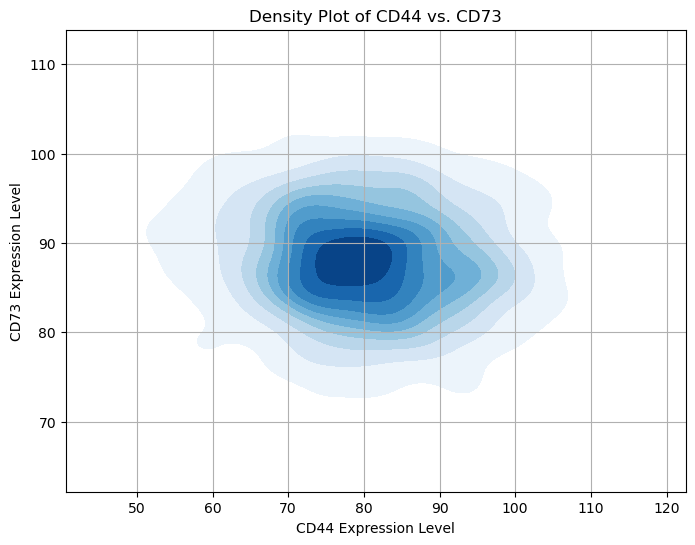

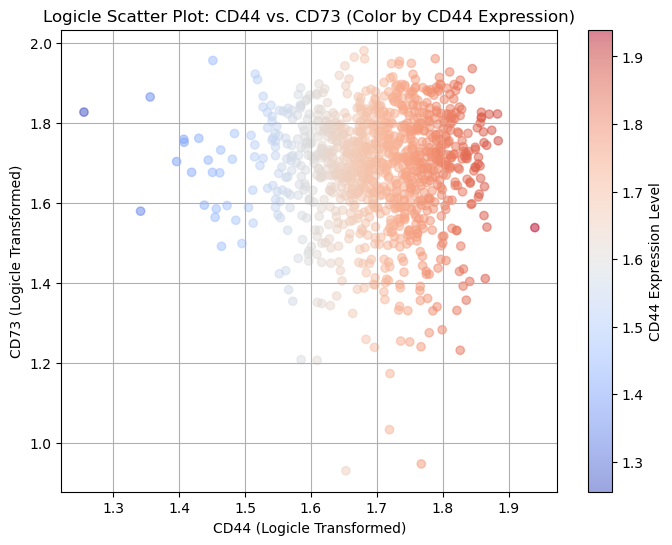

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Histogram of a Single Marker (e.g., CD10)
plt.figure(figsize=(8, 6))
sns.histplot(df['CD10'], kde=True, color='blue')
plt.title('Distribution of CD10 Expression')
plt.xlabel('CD10 Expression Level')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 3: Density Plot (CD44 vs. CD73)
plt.figure(figsize=(8, 6))
sns.kdeplot(x=df['CD44'], y=df['CD73'], cmap='Blues', shade=True)
plt.title('Density Plot of CD44 vs. CD73')
plt.xlabel('CD44 Expression Level')
plt.ylabel('CD73 Expression Level')
plt.grid(True)
plt.show()

# Re-import necessary libraries and redefine the logicle-transformed data to resolve the NameError

# Re-importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define logicle transformation function
def logicle_transform(data):
    """
    Custom logicle transformation function that handles both positive and negative values.
    This mimics bi-exponential scaling used in flow cytometry.
    """
    data = np.array(data)
    
    # Apply logarithmic transformation to positive values and keep negative values linear
    log_part = np.log10(data[data >= 0] + 1)  # Apply log for non-negative values
    linear_part = data[data < 0]               # Keep negative values unchanged
    
    # Combine the transformed arrays
    transformed = np.zeros_like(data)
    transformed[data >= 0] = log_part
    transformed[data < 0] = linear_part
    
    return transformed

# Generate synthetic data for flow cytometry
cd44 = np.random.normal(loc=50, scale=10, size=1000)
cd73 = np.random.normal(loc=50, scale=15, size=1000)

# Apply logicle transformation to both markers
cd44_logicle = logicle_transform(cd44)
cd73_logicle = logicle_transform(cd73)

# Create the scatter plot with differentiated colors for CD44 and CD73 expression levels
plt.figure(figsize=(8, 6))

# Create a scatter plot with a color gradient based on the CD44 expression levels
plt.scatter(cd44_logicle, cd73_logicle, alpha=0.5, c=cd44_logicle, cmap='coolwarm')

# Add titles and labels
plt.title('Logicle Scatter Plot: CD44 vs. CD73 (Color by CD44 Expression)')
plt.xlabel('CD44 (Logicle Transformed)')
plt.ylabel('CD73 (Logicle Transformed)')

# Display the color bar to indicate the gradient of CD44 expression levels
plt.colorbar(label='CD44 Expression Level')

plt.grid(True)
plt.show()

